In [1]:
from time import time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def obtiene_tiempos(fun, args, num_it=100):
    tiempos_fun = []
    resultados_fun = []
    for i in range(num_it):
        arranca = time()
        sat, I = fun(*args)
        para = time()
        tiempos_fun.append(para - arranca)
        resultados_fun.append(1 if sat=='Satisfacible' else 0)
    return tiempos_fun, resultados_fun

def compara_entradas_funs(funs, nombres_funs, lista_args, N=100):
    entradas = []
    funcion = []
    tiempos = []
    resultados = []
    lista_dfs = []
    for i, args in enumerate(lista_args):
        for j, fun in enumerate(funs):
            t, res = obtiene_tiempos(fun, [args], N)
            tiempos += t
            resultados += res
            entradas += [i+1]*len(t)
            funcion += [nombres_funs[j]]*len(t)
        df = pd.DataFrame({'Long_entrada':entradas, 
                           'Funcion':funcion,
                           'Tiempo_prom':tiempos,
                           'Resultados':resultados})
        lista_dfs.append(df)
    return pd.concat(lista_dfs).reset_index()

def aumentar_cadena(c, condicion, atomos):

	if c == None:
		print('No se puede aumentar la cadena: atomos insuficientes?')
		return None

	if condicion == 'A':

		atomo = ''
		for a in atomos:
			if a not in c:
				atomo = a
				break

		if atomo == '':
			return None

		# aumenta cadena siguiendo condicion A
		return c + [atomo, 'Y']

	if condicion == 'B':
		# encuentra letra no usada en atomos y primer atomo
		atomo1 = ''
		atomo2 = ''
		for a in atomos:
			if a in c:
				if atomo1 == '':
					atomo1 = a
			else:
				atomo2 = a
				if atomo1 != '':
					break

		if atomo1 == '' or atomo2 == '':
			return None

		# aumenta cadena siguiendo condicion B
		return c + [atomo1, atomo2, 'O', 'Y']

	if condicion == 'C':
		# encuentra los dos atomos
		atomo1 = atomos[0]
		atomo2 = atomos[1]

		# aumenta cadena siguiendo condicion C
		return c + [atomo1, atomo2, 'O', 'Y']

	if condicion == 'D':
		# encuentra letra no usada en atomos y primer atomo
		atomo1 = ''
		atomo2 = ''
		for a in atomos:
			if a in c:
				if atomo1 == '':
					atomo1 = a
			else:
				atomo2 = a
				if atomo1 != '':
					break

		if atomo1 == '' or atomo2 == '':
			return None

		# aumenta cadena siguiendo condicion D
		return c + [atomo1, atomo2, 'Y', 'O']


In [2]:
from Logica import *

cantidad = 10
letrasp = [chr(i) for i in range(257, 257+cantidad)]

cnd = 'A'
lista = []

print('\n**********************')
print(u"Condición:", cnd)
cadena = [letrasp[0], letrasp[1], 'Y']
for i in range(1, len(letrasp)):
#    print('\n**********************')
#    print(u"Iteración:", i)
    cadena = aumentar_cadena(cadena, cnd, letrasp)
#    print(cadena)
    if cadena != None:
        A = polaca_inversa_to_tree(cadena, letrasp)
        A = str(A)
#        print('Trabajando con: ', A)
#        A = tseitin(A)
#        A = fnc_numero(A)
        lista.append(A)
    
lista


**********************
Condición: A


['(ăY(ĂYā))',
 '(ĄY(ăY(ĂYā)))',
 '(ąY(ĄY(ăY(ĂYā))))',
 '(ĆY(ąY(ĄY(ăY(ĂYā)))))',
 '(ćY(ĆY(ąY(ĄY(ăY(ĂYā))))))',
 '(ĈY(ćY(ĆY(ąY(ĄY(ăY(ĂYā)))))))',
 '(ĉY(ĈY(ćY(ĆY(ąY(ĄY(ăY(ĂYā))))))))',
 '(ĊY(ĉY(ĈY(ćY(ĆY(ąY(ĄY(ăY(ĂYā)))))))))']

In [16]:
# !pip install python-sat
from pysat.solvers import Solver, Minisat22

def SATsolver(A):
    
    def lit_numero(l):
        if '-' in l:
            return -ord(l[1:]) + 256
        else:
            return ord(l) - 256
    
    def clausula_numero(C):
        return [lit_numero(l) for l in C]

    def fnc_numero(S):
        return [clausula_numero(C) for C in S]

    def obtener_int(mod):
        return {chr(256 + abs(n)):n>0 for n in mod}
        
    S = tseitin(A)
    S = fnc_numero(S)
    with Minisat22(bootstrap_with=S) as m:
        if m.solve():
            return 'Satisfacible', obtener_int(m.get_model())
        else:
            return 'Insatisfacible', {}

In [17]:
S = lista[0]
S

'(ăY(ĂYā))'

In [18]:
inorder_to_tree(S).SATtabla()

('Satisfacible', {'ă': True, 'ā': True, 'Ă': True})

In [19]:
SATsolver(S)

('Satisfacible', {'ā': True, 'Ă': True, 'ă': True, 'Ą': True})

In [20]:
nombres = ['SATsolver']
funs = [SATsolver]
df = compara_entradas_funs(funs, nombres, lista)
df.head()

,index,Long_entrada,Funcion,Tiempo_prom,Resultados
0,0,1,SATsolver,0.000298,1
1,1,1,SATsolver,0.000113,1
2,2,1,SATsolver,0.000160,1
3,3,1,SATsolver,0.000160,1
4,4,1,SATsolver,0.000159,1


<AxesSubplot:xlabel='Long_entrada', ylabel='Tiempo_prom'>

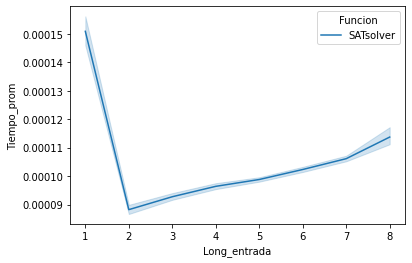

In [21]:
sns.lineplot(x='Long_entrada',y='Tiempo_prom',hue='Funcion',data=df)